## Applied Machine Learning
### Assignment-I
### Introductory Data Analysis Assignment

Date of Submission: 20th January 2025

    Submitted to:                           Submitted by:
    Dr. Shresth Gupta                       Amulya Jain
                                            B. Tech CSE AIML Batch 1
                                            SAP Id: 500122439

### Detailed Analysis below

#### Understanding the Data and Dataset:

**What is Real Estate ?**

Real estate refers to land and any permanent structures attached to it, such as buildings, houses, or other improvements. It plays a crucial role in the economy, as it involves property ownership, investment and development.

**Factors which Affect Real Estate Price (Y)**:

- **X1: Transaction Date**: 
    - This tells the year and time when the property was sold. As Real estate prices often change over time due to Market trends, Seasonality and Property age.

- **X2: House Age**: 
    - This tells age of the house in years as Older houses often cost less and may require more maintenance or renovations. 

- **X3: Distance to the Nearest MRT Station**: 
    - It tells how far the house is from the nearest public transportation (measured in distance units).   
    - Buyers often pay more for better access to MRT stations, especially in urban areas. so Properties closer to public transportation are more convenient for commuting, hence expensive.

- **X4: Number of Convenience Stores**: 
    - It is the count of nearby convenience stores. 
    - More convenience stores means better access to daily necessities which therefore means improved living standards of the area hence increasing property value.

- **X5 & X6: Latitude and Longitude**: 
    - It tells about geographic coordinates that pinpoint the property’s location. 
    - Basically estates which are in prime or desirable locations like near city or amenities will have higher prices.

where **Y: House Price of Unit Area**: The target variable representing the price per unit area.
- A newer house near public transport and convenience stores in a prime location will likely have a higher price.
- A remote, older house with fewer amenities will cost less.

### Assignment Questions

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

###  1. Dataset Overview:

####  Load the dataset

In [2]:
path = "Real estate.csv"
df = pd.read_csv(path)

In [3]:
# Size of our data
df.size

3312

In [4]:
# Dimension of our data
df.ndim

2

In [5]:
# Shape of our data
df.shape

(414, 8)

####  Display the first five rows

In [6]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Identify the column names and data types

In [7]:
# Columns of our data
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
# Data types of our data
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [9]:
# Information about our data -> columns, data types, null count and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


#### Dataset Observations:
1. No missing data in any column or row.
2. Upon observing the general information of all the columns:
    - Column "X1 transaction date" is inconsistent due to: 
        - Data Type: float64
        - Preferred Data Type: Datetime data type

In [10]:
# We need to convert the 'X1 transaction date' column to datetime format so that we can work with it

def fractional_year_to_date(fractional_year):
    
    year = int(fractional_year) # Get year from fraction
    remainder = fractional_year - year # Get fraction
    
    # Check if year is a leap year
    days_in_year = 0
    if year % 4 == 0:
        if year % 100 != 0 or year % 400 == 0:
            days_in_year = 366 
        else:
            days_in_year = 365 
    else:
        days_in_year = 365
        
    days = int(remainder * days_in_year)  # Convert fraction to days
    date = pd.Timestamp(year=year, month=1, day=1) + pd.Timedelta(days=days)  # Add calculated days to Jan 1
    
    return date

df['X1 transaction date'] = df['X1 transaction date'].apply(fractional_year_to_date) # Applying the function to the column
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


##### After converting the column to datetime format, we can see that the data type of the column has changed

In [11]:
# We can confirm by checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   No                                      414 non-null    int64         
 1   X1 transaction date                     414 non-null    datetime64[ns]
 2   X2 house age                            414 non-null    float64       
 3   X3 distance to the nearest MRT station  414 non-null    float64       
 4   X4 number of convenience stores         414 non-null    int64         
 5   X5 latitude                             414 non-null    float64       
 6   X6 longitude                            414 non-null    float64       
 7   Y house price of unit area              414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 26.0 KB


#### Dataset Observations:
1. Total Null values in all columns is 0.
2. Column "X1 transaction date" is now consistent with datetime64[ns] Data Type, useful data format for further analysis.


### 2. Statistical Summary:

#### Generate a statistical summary (mean, median, standard deviation, minimum, and maximum) for all numerical columns.

##### We will analyze the dataset through the given parameters: 
- **Mean**: Average value tells the central tendency. We can compare it with the median (50%) to detect skewness.
- **Min/Max**: Shows the range and potential outliers. A large gap suggests variability or possible outliers.
- **Quartiles (25%, 50%, 75%)**: Helps you understand how the data is distributed. A narrow range means most values are similar; a wide range suggests diversity.
- **Standard Deviation (std)**: measures the average deviation of data points from the mean. Indicates the spread of the data & is influenced by extreme values (outliers)

In [12]:
# Summary statistics of our data
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013-02-23 20:55:39.130434816,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
min,1.000000,2012-09-01 00:00:00,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012-12-01 00:00:00,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013-03-02 00:00:00,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013-06-02 00:00:00,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013-08-01 00:00:00,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
std,119.655756,NaN,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488


#### What does this summary tell us about the distribution of house prices and other features?

##### Key Observations which can be made through Summary:

1. **Y house price of unit area (Target Variable)**:
   - **Mean**: The average price is 37.98 per unit area.
   - **Range (Min to Max)**: The range of house prices is from 7.6 to 117.5, indicating significant variation.
   - **Quartiles**:
     - 25th Percentile: 27.7
     - Median (50th Percentile): 38.45
     - 75th Percentile: 46.6
   - **Standard Deviation (std)**: 13.61, showing a moderate spread around the mean.

2. **X1 Transaction Date**:
   - **Range (Min to Max)**: Contains timestamp data. The time range is from September 1, 2012, to August 1, 2013.
   - **Insight**: This will be used to track trends in house prices over time.

3. **X2 House Age**:
   - **Mean**: The average house age is 17.71 years.
   - **Range (Min to Max)**: Ranges from 0 to 43.8 years.
   - **Quartiles**:
     - 25th Percentile: 9.03
     - Median: 16.1
     - 75th Percentile: 28.15
   - **Insight**: The data includes both new (age 0) and older houses. We see most houses are under 30 years old from Quartiles and Range.

4. **X3 Distance to the Nearest MRT Station**:
   - **Mean**: The average distance is 1083.89 meters.
   - **Range (Min to Max)**: The closest is 23.38 meters, and the farthest is 6488 meters.
   - **Quartiles**:
     - 25th Percentile: 289.32 meters
     - Median: 492.23 meters
     - 75th Percentile: 1454.28 meters
   - **Insight**: There is a wide range of distances, with a few properties being much farther from MRT stations, suggesting potential outliers.

5. **X4 Number of Convenience Stores**:
   - **Mean**: On average, there are 4.09 convenience stores nearby.
   - **Range (Min to Max)**: Ranges from 0 to 10 stores.
   - **Quartiles**:
     - 25th Percentile: 1 store
     - Median: 4 stores
     - 75th Percentile: 6 stores
   - **Insight**: Most properties have access to at least one convenience store. Very few have no stores nearby.

6. **X5 Latitude & X6 Longitude**:
   - **Latitudes** range from 24.93207 to 25.01459
   - **Longitudes** range from 121.47353 to 121.56627.
   - **Insight**: The less spread of location properties is limited to a specific area meaning the dataset represents a city or region.

#### General Observations:
- **Distribution**: Most features, especially house age, number of stores and distance to MRT stations, show a spread of values with potential outliers.
- **Relationships**: House prices may correlate with proximity to MRT stations and the number of convenience stores, as these often influence property value.

#### Statistical Observations: 
1. **Distance to MRT Stations**
   - **Wide Range**: From 23.38 meters to 6488 meters
   - **Quartile Insights**: 75% of properties are within 1454 meters from an MRT station, which can be used to distinguish typical properties from remote ones.

   **Insight**: Properties that are far from MRT stations (above the 75th percentile) are likely to be priced lower due to less accessibility indicating outliers, which could be factored into pricing models.


In [13]:
# Calculating IQR (Interquartile Range) for 'Y house price of unit area' to check for outliers
Q1 = np.percentile(df['Y house price of unit area'], 25)
Q3 = np.percentile(df['Y house price of unit area'], 75)
IQR = Q3 - Q1

print(f"IQR (Interquartile Range): {IQR}")

IQR (Interquartile Range): 18.900000000000002


2. **House Price Distribution**
   - **Interquartile Range (IQR)**: 18.90
   - **Standard Deviation**: 13.61
   **Insight**: The IQR is larger than the standard deviation, suggesting that the data may be skewed or contain outliers.

### 3. Data Cleaning:

##### Check for missing values in the dataset.

In [14]:
# Is there any missing value in our data 
df.isna()
# This will return True if there is any missing value in our data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [15]:
# Number of missing values in each column
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

##### Check for duplicate values in the dataset.

In [16]:
# Checking for duplicates
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool


In [17]:
# Number of duplicates
df.duplicated().sum()

0

### 4. Univariate Analysis:

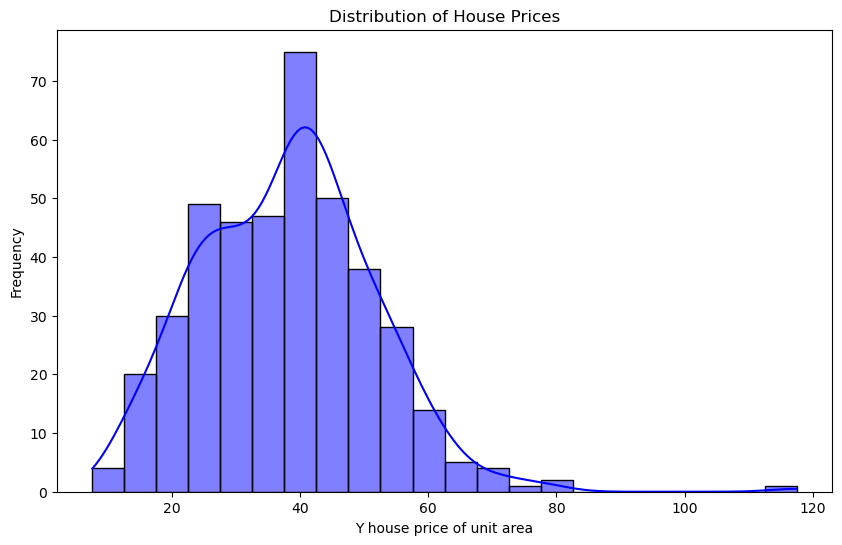

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Y house price of unit area', kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Y house price of unit area')
plt.ylabel('Frequency')
plt.show()


In [19]:
import scipy

In [20]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['Y house price of unit area'])
print(f"Skewness of house prices: {skewness}")


Skewness of house prices: 0.5976770142537495


#### Interpretation of Skewness

- **Skewness ≈ 0**: 
  - The data is approximately symmetrical (normal distribution).

- **Positive Skewness (Skewness > 0)**:
  - Right-tailed distribution (long tail on the right).
  - More data points concentrated on the left.

- **Negative Skewness (Skewness < 0)**:
  - Left-tailed distribution (long tail on the left).
  - More data points concentrated on the right.

#### Thresholds for Skewness
- **-0.5 to 0.5**: Approximately symmetrical (no transformation needed).
- **0.5 to 1 or -0.5 to -1**: Moderately skewed (transformation may help).
- **>1 or <-1**: Highly skewed (transformation recommended).

---

##### Example: Skewness of House Prices

- **Skewness Value**: 0.5977
- **Interpretation**: 
  - The data is moderately positively skewed.
  - There is a slight right-tailed distribution with more data points concentrated on the left.


#### Methods to Reduce Positive Skewness

##### 1. **Logarithmic Transformation** 
   - **Use for**: Data with a large range of values.
   - **Effect**: Reduces the impact of larger values, making the distribution more symmetrical.

##### 2. **Square Root Transformation** 
   - **Use for**: Mildly skewed data.
   - **Effect**: Reduces moderate skewness and is useful when the data contains non-negative values.

##### 3. **Box-Cox Transformation** 
   - **Use for**: General use.
   - **Effect**: A flexible transformation that automatically finds the best transformation parameter to normalize the data.

##### 4. **Reciprocal Transformation** 
   - **Use for**: Data that exhibits a high degree of skewness.
   - **Effect**: Effective for reducing skewness but can amplify differences in smaller values, making it suitable for specific scenarios.


In [21]:
# We should normalise the data to make it more interpretable so we will make a copy of the data
# and normalise the 'Y house price of unit area' column due to its skewness
df_normalised = df.copy()
df_normalised

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


##### Using Log Transformation

In [22]:
# We should normalise the data to make it more interpretable so we will make a copy of the data
# here we will log transform first by making copy of the data
df_normalised_log = df.copy()

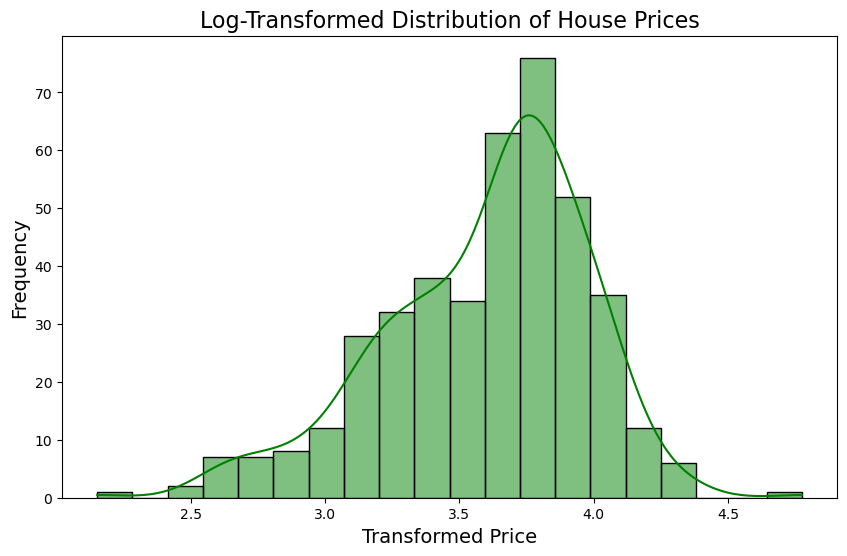

In [23]:
df_normalised_log['Price_log'] = np.log1p(df_normalised_log['Y house price of unit area'])

plt.figure(figsize=(10, 6))
sns.histplot(df_normalised_log['Price_log'], kde=True, color='green') 
plt.title('Log-Transformed Distribution of House Prices', fontsize=16)
plt.xlabel('Transformed Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


##### Using Square Root Transformation

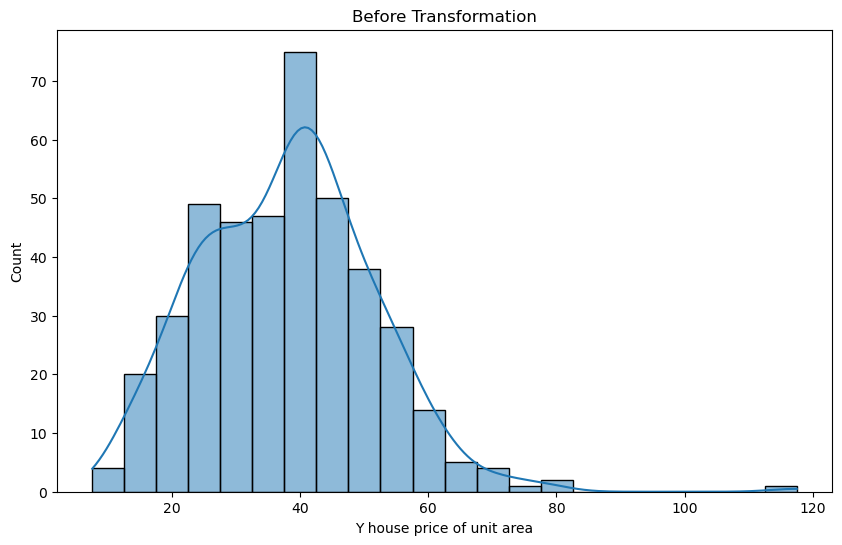

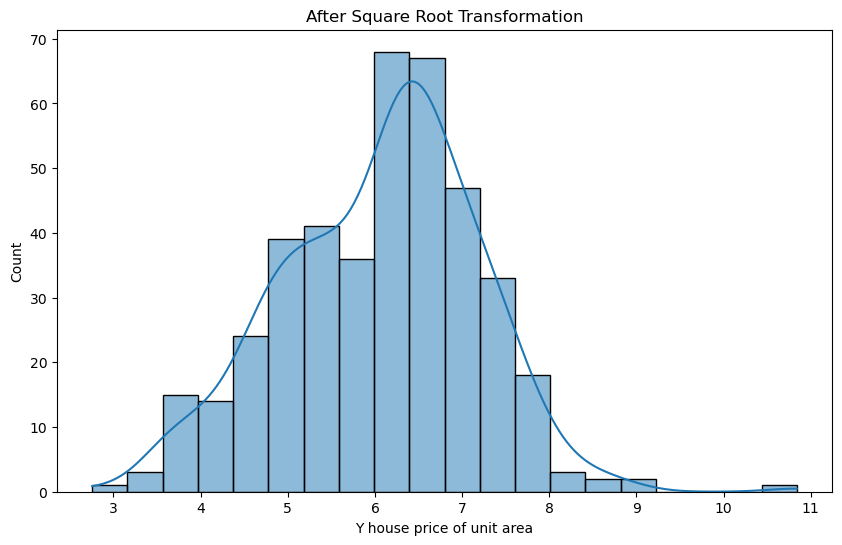

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_normalised['Y house price of unit area'], kde=True)
plt.title("Before Transformation")
plt.show()


df_normalised['Y house price of unit area'] = np.sqrt(df_normalised['Y house price of unit area'])
plt.figure(figsize=(10, 6))
sns.histplot(df_normalised['Y house price of unit area'], kde=True)
plt.title("After Square Root Transformation")
plt.show()


#### Conclusion:
##### We see Square Root Transformation is much better for this dataset.

In [25]:
df_normalised

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059
...,...,...,...,...,...,...,...,...
409,410,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,3.924283
410,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068
411,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813
412,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688


### 5. Feature Exploration:

In [26]:
# Drop non-numeric or irrelevant columns for boxplots
numerical_features = df_normalised.drop(columns=["No", "X1 transaction date", "X5 latitude", "X6 longitude"])

#### Exploring BoxPlot for each existing features of Normalised Dataset

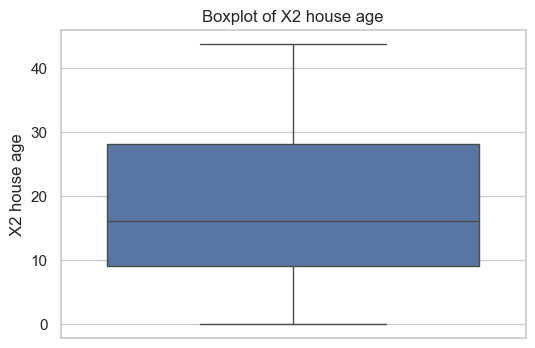

In [27]:
sns.set_theme(style="whitegrid")

# Boxplot for X2 house age
plt.figure(figsize=(6, 4))
sns.boxplot(y=numerical_features["X2 house age"])
plt.title("Boxplot of X2 house age")
plt.show()


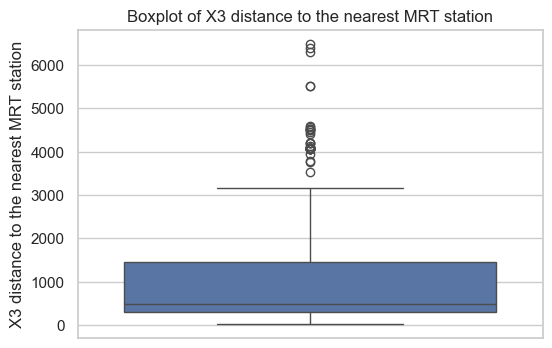

In [28]:
# Boxplot for X3 distance to the nearest MRT station
plt.figure(figsize=(6, 4))
sns.boxplot(y=numerical_features["X3 distance to the nearest MRT station"])
plt.title("Boxplot of X3 distance to the nearest MRT station")
plt.show()


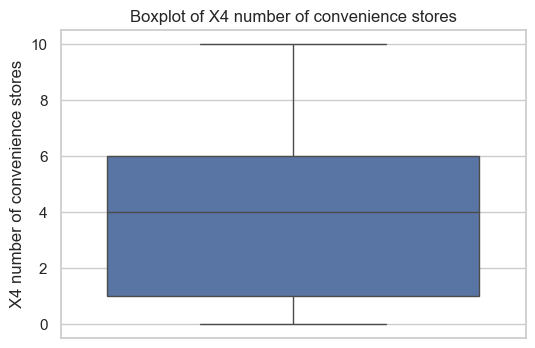

In [29]:

# Boxplot for X4 number of convenience stores
plt.figure(figsize=(6, 4))
sns.boxplot(y=numerical_features["X4 number of convenience stores"])
plt.title("Boxplot of X4 number of convenience stores")
plt.show()

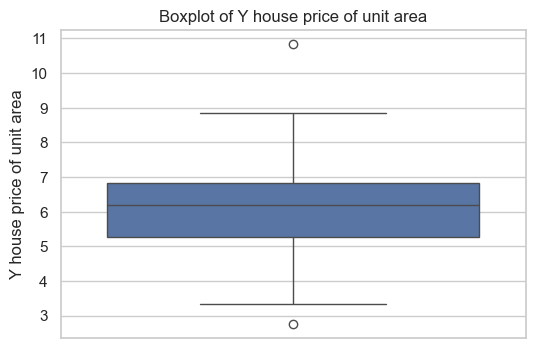

In [30]:
# Boxplot for Y house price of unit area
plt.figure(figsize=(6, 4))
sns.boxplot(y=numerical_features["Y house price of unit area"])
plt.title("Boxplot of Y house price of unit area")
plt.show()

##### We can remove outliers to make our analysis free of anomalies

In [31]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'X3 distance to the nearest MRT station'
df_no_outliers = remove_outliers(df_normalised, "X3 distance to the nearest MRT station")

# Remove outliers for 'Y house price of unit area'
df_no_outliers = remove_outliers(df_no_outliers, "Y house price of unit area")


In [32]:
# Display the cleaned DataFrame
df_no_outliers = df_no_outliers.reset_index(drop=True)
df_no_outliers

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059
...,...,...,...,...,...,...,...,...
370,409,2013-06-02,18.5,2175.74400,3,24.96330,121.51243,5.300943
371,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068
372,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813
373,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688


##### Extracting year and month from the date

In [33]:
df_no_outliers['year'] = df_no_outliers['X1 transaction date'].dt.year
df_no_outliers['month'] = df_no_outliers['X1 transaction date'].dt.month

In [34]:
# Group by year and month
houses_per_year = df_no_outliers.groupby('year').size()
houses_per_month = df_no_outliers.groupby('month').size()

In [35]:
# Convert Series to DataFrame
houses_per_year = pd.DataFrame(houses_per_year)
houses_per_month = pd.DataFrame(houses_per_month)

##### Dataset with more features

In [36]:
df_no_outliers

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year,month
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298,2012,12
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153,2012,12
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500,2013,8
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702,2013,7
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059,2012,10
...,...,...,...,...,...,...,...,...,...,...
370,409,2013-06-02,18.5,2175.74400,3,24.96330,121.51243,5.300943,2013,6
371,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068,2012,9
372,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813,2013,4
373,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688,2013,1


In [37]:
# Filter data for 2012 and 2013
data_2012 = df_no_outliers[df_no_outliers['year'] == 2012]
data_2013 = df_no_outliers[df_no_outliers['year'] == 2013]

In [38]:

# Group by month and count the number of houses sold
houses_2012 = data_2012.groupby('month').size()
houses_2013 = data_2013.groupby('month').size()
houses_combined = houses_per_month.copy()

In [39]:

houses_2012 = pd.DataFrame(houses_2012)
houses_2013 = pd.DataFrame(houses_2013)


In [40]:

houses_per_year = houses_per_year.reset_index()
# Rename the columns
houses_per_year.columns = ['year', 'No. of houses sold in that particular year']
houses_per_year

,year,No. of houses sold in that particular year
0,2012,116
1,2013,259


In [41]:
# Reset index if 'year' is the index
houses_combined = houses_combined.reset_index()

# Rename the columns
houses_combined.columns = ['month', 'No. of houses sold in that particular month']
houses_combined

,month,No. of houses sold in that particular month
0,1,67
1,3,23
2,4,32
3,5,24
4,6,56
5,7,36
6,8,21
7,9,28
8,10,52
9,12,36


##### To show the months also

In [42]:
import calendar

all_months = pd.DataFrame({
    'month': list(range(1, 13)),
    'month_name': [calendar.month_name[i] for i in range(1, 13)]
})

# Left Join the DataFrames
houses_combined = pd.merge(all_months, houses_combined, on='month', how='left')
houses_combined['No. of houses sold in that particular month'] = houses_combined[
    'No. of houses sold in that particular month'
].fillna(0).astype(int)

houses_combined

,month,month_name,No. of houses sold in that particular month
0,1,January,67
1,2,February,0
2,3,March,23
3,4,April,32
4,5,May,24
5,6,June,56
6,7,July,36
7,8,August,21
8,9,September,28
9,10,October,52


##### similarly for 2012 and 2013 yearwise data

In [43]:
houses_2012

,0
month,
9,28
10,52
12,36


In [44]:
# Define all months and their names
all_months = pd.DataFrame({
    'month': [9, 10, 12],
    'month_name': ['September', 'October', 'December'] 
})

houses_2012 = pd.merge(all_months, houses_2012, on='month', how='left')
houses_2012 = houses_2012.rename(columns={0: 'No. of houses sold in that particular month'})

houses_2012

,month,month_name,No. of houses sold in that particular month
0,9,September,28
1,10,October,52
2,12,December,36


In [45]:
houses_2013

,0
month,
1,67
3,23
4,32
5,24
6,56
7,36
8,21


In [46]:
# Define all months and their names
all_months = pd.DataFrame({
    'month': [1, 3, 4, 5, 6, 7, 8],
    'month_name': ['January', 'March', 'April', 'May', 'June', 'July', 'August'] 
})

houses_2013 = pd.merge(all_months, houses_2013, on='month', how='left')
houses_2013 = houses_2013.rename(columns={0: 'No. of houses sold in that particular month'})

# Display the updated DataFrame
houses_2013

,month,month_name,No. of houses sold in that particular month
0,1,January,67
1,3,March,23
2,4,April,32
3,5,May,24
4,6,June,56
5,7,July,36
6,8,August,21


#### Now, Plots for:
##### 1. Month-wise Number of Houses Sold in 2012
##### 2. Month-wise Number of Houses Sold in 2013
##### 3. combined

C:\Users\hp\AppData\Local\Temp\ipykernel_235152\1553842843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='No. of houses sold in that particular month', data=houses_2012, palette='Blues_d')


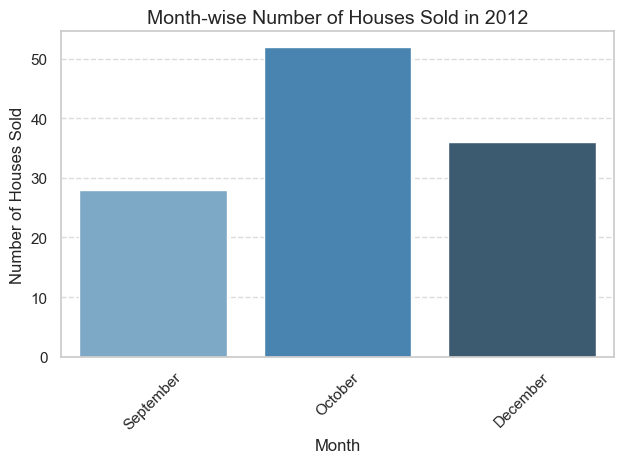

C:\Users\hp\AppData\Local\Temp\ipykernel_235152\1553842843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='No. of houses sold in that particular month', data=houses_2013, palette='Greens_d')


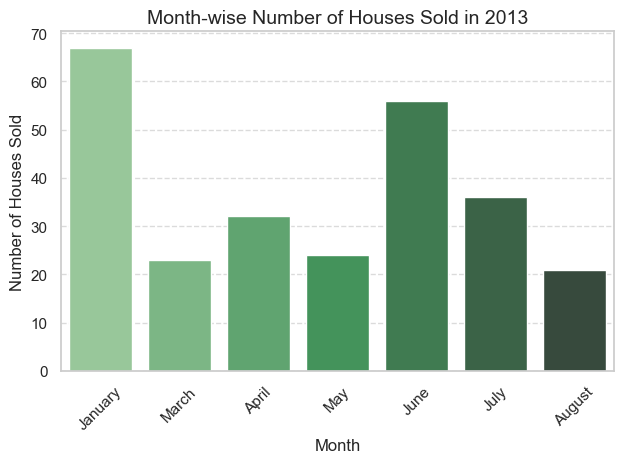

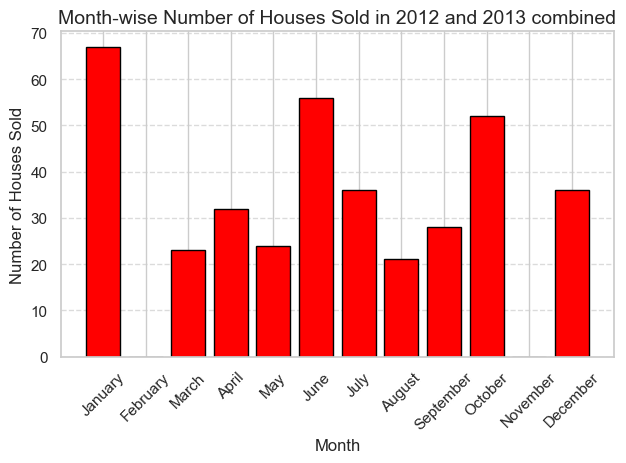

In [47]:
sns.barplot(x='month_name', y='No. of houses sold in that particular month', data=houses_2012, palette='Blues_d')
plt.title('Month-wise Number of Houses Sold in 2012', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

sns.barplot(x='month_name', y='No. of houses sold in that particular month', data=houses_2013, palette='Greens_d')
plt.title('Month-wise Number of Houses Sold in 2013', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the houses_combined data
plt.bar(
    houses_combined['month_name'], 
    houses_combined['No. of houses sold in that particular month'], 
    color='red', 
    edgecolor='black'
)
plt.title('Month-wise Number of Houses Sold in 2012 and 2013 combined', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

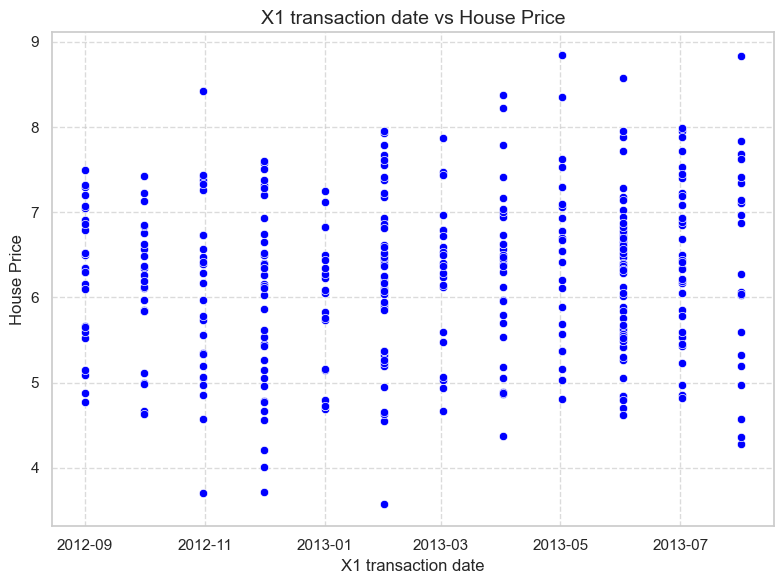

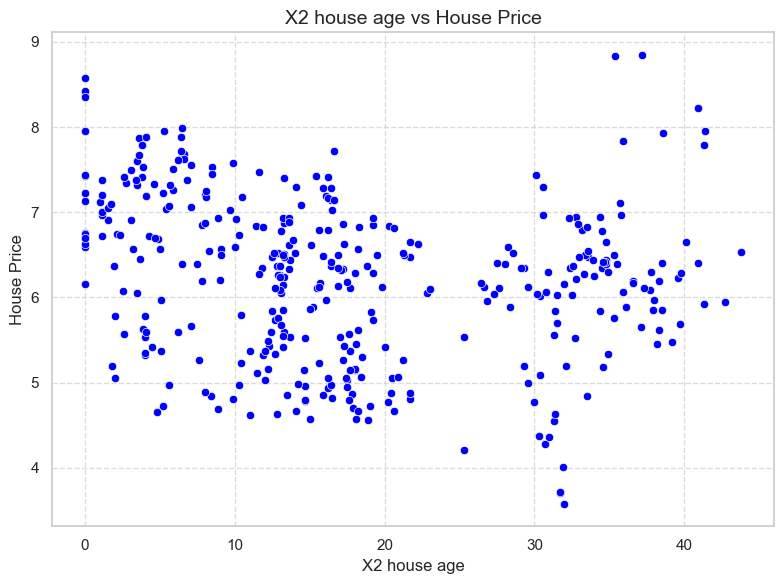

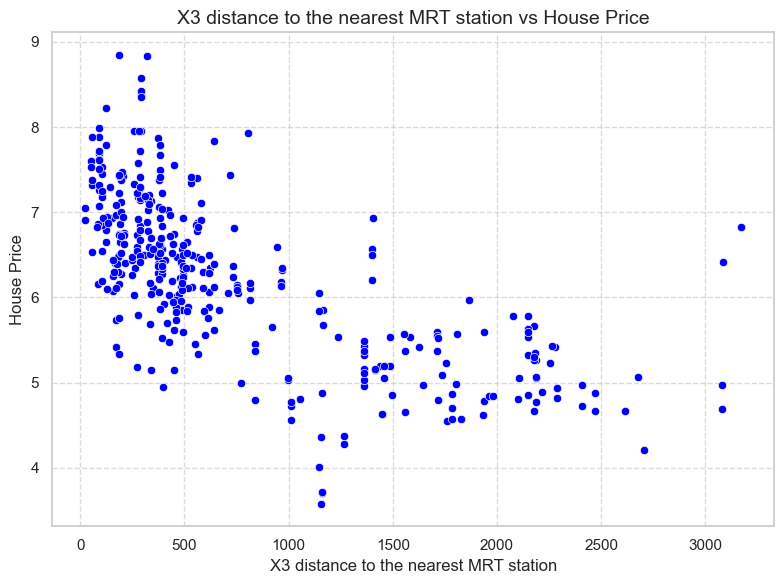

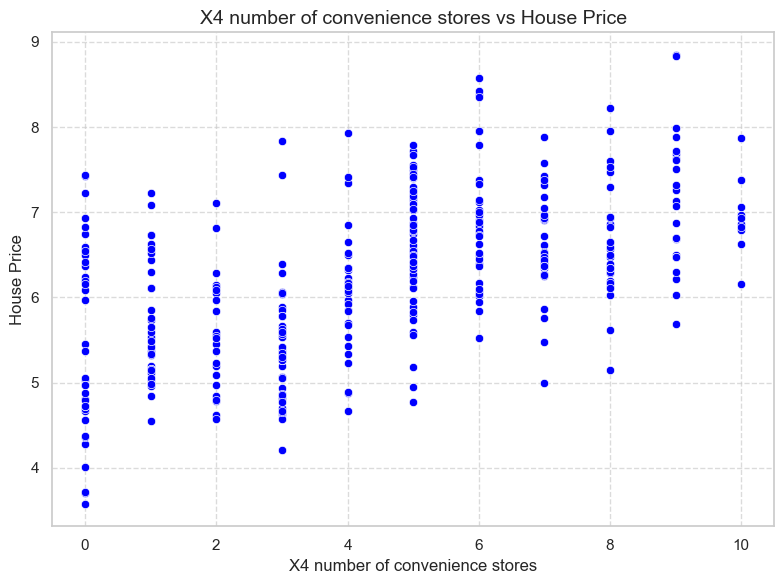

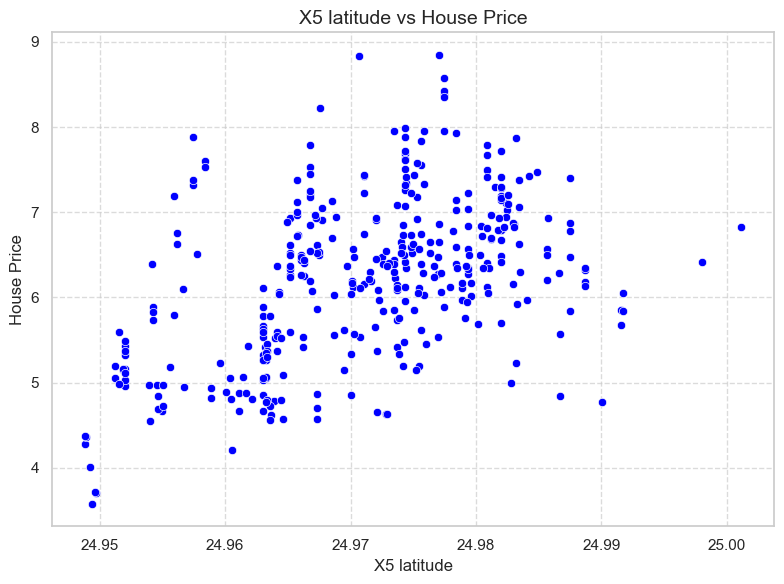

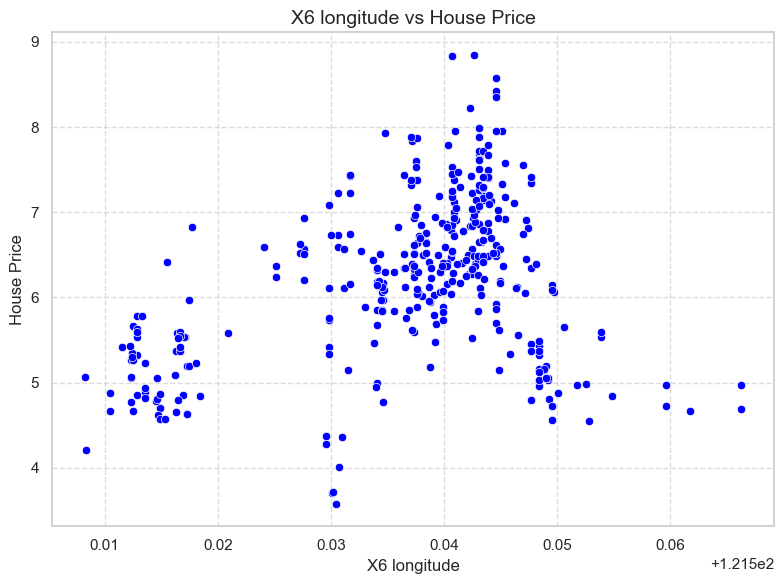

In [48]:
sns.set_theme(style="whitegrid")

features = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", 
            "X4 number of convenience stores", "X5 latitude", "X6 longitude"]

# scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_no_outliers, x=feature, y="Y house price of unit area", color='blue')
    plt.title(f"{feature} vs House Price", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("House Price", fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [49]:
grouped_data = df_no_outliers.groupby("X4 number of convenience stores").size().reset_index(name="count")
grouped_data

,X4 number of convenience stores,count
0,0,39
1,1,36
2,2,24
3,3,46
4,4,31
5,5,67
6,6,36
7,7,31
8,8,30
9,9,25


C:\Users\hp\AppData\Local\Temp\ipykernel_235152\851065249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='X4 number of convenience stores', y='count', data=grouped_data, palette='viridis')


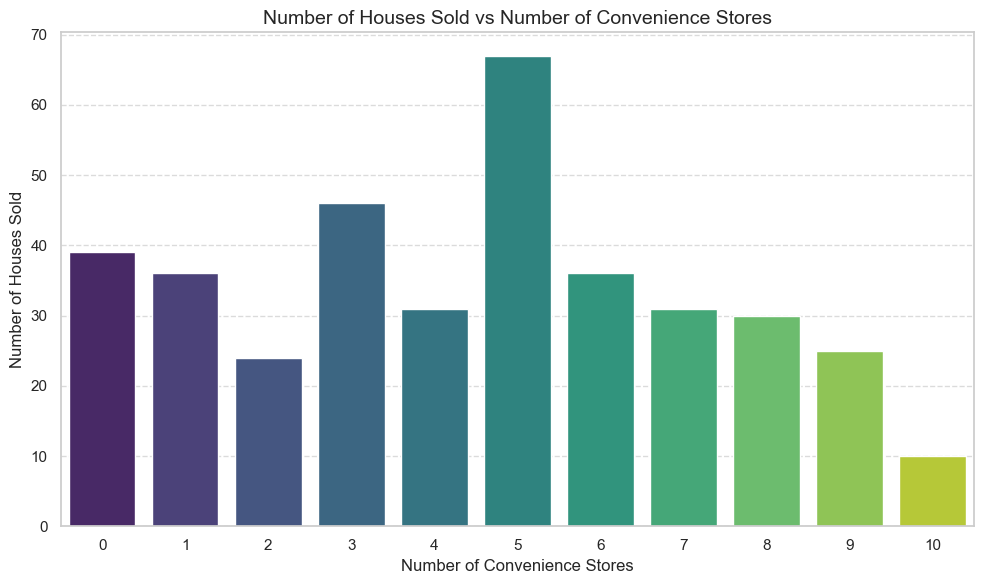

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='X4 number of convenience stores', y='count', data=grouped_data, palette='viridis')
plt.title('Number of Houses Sold vs Number of Convenience Stores', fontsize=14)
plt.xlabel('Number of Convenience Stores', fontsize=12)
plt.ylabel('Number of Houses Sold', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [73]:
def categorize_house_age(age):
    if age <= 10:
        return 0
    elif age <= 20 and age > 10:
        return 1
    elif age <= 30 and age > 20:
        return 2
    elif age <= 40 and age > 30:
        return 3
    else:
        return 4

df_no_outliers['Age Category'] = df_no_outliers['X2 house age'].apply(categorize_house_age)


grouped = df_no_outliers.groupby('Age Category')
grouped = grouped.size().reset_index(name='Number of Houses')

grouped

,Age Category,Number of Houses
0,0,110
1,1,141
2,2,35
3,3,81
4,4,8


In [74]:
df_no_outliers

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year,month,Age Category
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298,2012,12,3
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153,2012,12,1
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500,2013,8,1
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702,2013,7,1
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059,2012,10,0
...,...,...,...,...,...,...,...,...,...,...,...
370,409,2013-06-02,18.5,2175.74400,3,24.96330,121.51243,5.300943,2013,6,1
371,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068,2012,9,0
372,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813,2013,4,1
373,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688,2013,1,0


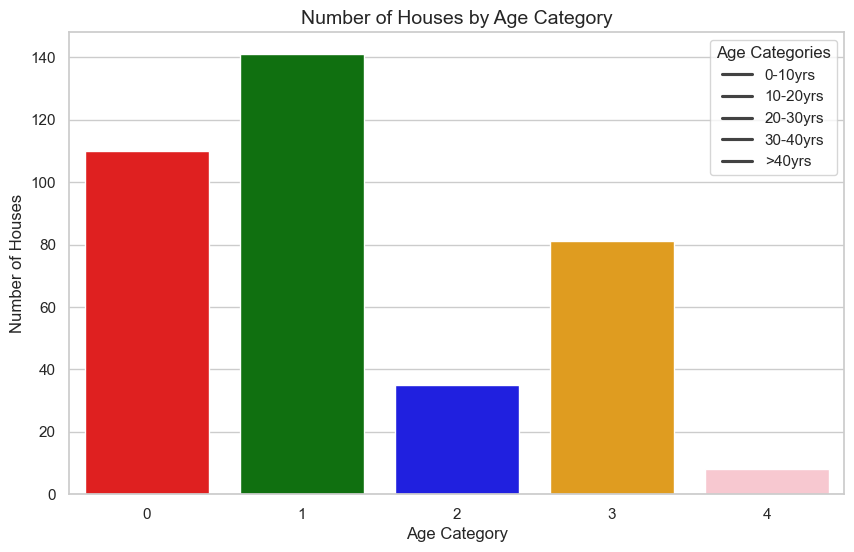

In [ ]:
# Define colors for each age category
colors = ['red', 'green', 'blue', 'orange', 'pink']

# Bar chart for counts with colors and legend
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Category', y='Number of Houses', hue='Age Category', data=grouped, palette=colors)
plt.title("Number of Houses by Age Category", fontsize=14)
plt.xlabel("Age Category", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.legend(labels=["0-10yrs", "10-20yrs", "20-30yrs", "30-40yrs", ">40yrs"], title="Age Categories")
plt.show()

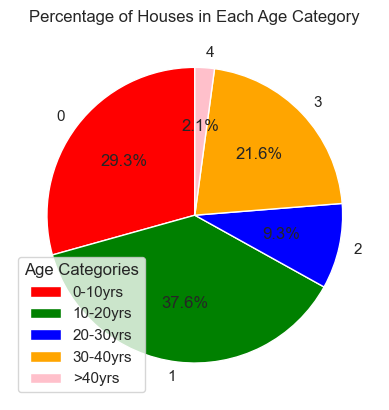

In [75]:
# Pie chart for percentage
plt.pie(grouped['Number of Houses'], labels=grouped['Age Category'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange', 'pink'])
plt.title("Percentage of Houses in Each Age Category")
plt.legend(labels=["0-10yrs", "10-20yrs", "20-30yrs", "30-40yrs", ">40yrs"], title="Age Categories")
plt.show()

Now, Our current dataframe looks like: -

In [87]:
df_no_outliers

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year,month,Age Category
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,6.156298,2012,12,3
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,6.496153,2012,12,1
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,6.877500,2013,8,1
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,7.402702,2013,7,1
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,6.565059,2012,10,0
...,...,...,...,...,...,...,...,...,...,...,...
370,409,2013-06-02,18.5,2175.74400,3,24.96330,121.51243,5.300943,2013,6,1
371,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,7.071068,2012,9,0
372,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,6.371813,2013,4,1
373,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,7.245688,2013,1,0


In [88]:
df = df_no_outliers.drop(columns=['No', 'X1 transaction date', 'X5 latitude', 'X6 longitude', 'year', 'month'])

In [93]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Age Category column
age_category_encoded = encoder.fit_transform(df[['Age Category']])

# Convert the encoded array to a DataFrame
age_category_encoded_df = pd.DataFrame(age_category_encoded, columns=encoder.get_feature_names_out(['Age Category']))

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df, age_category_encoded_df], axis=1)

# Drop the original Age Category column
df_encoded = df_encoded.drop(columns=['Age Category'])

df_encoded.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,Age Category_0,Age Category_1,Age Category_2,Age Category_3,Age Category_4
0,32.0,84.87882,10,6.156298,0.0,0.0,0.0,1.0,0.0
1,19.5,306.59470,9,6.496153,0.0,1.0,0.0,0.0,0.0
2,13.3,561.98450,5,6.877500,0.0,1.0,0.0,0.0,0.0
3,13.3,561.98450,5,7.402702,0.0,1.0,0.0,0.0,0.0
4,5.0,390.56840,5,6.565059,1.0,0.0,0.0,0.0,0.0


In [90]:
# Compute correlation matrix
corr_matrix = df.corr()
corr_matrix

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,Age Category
X2 house age,1.000000,-0.069856,0.075514,-0.209615,0.970818
X3 distance to the nearest MRT station,-0.069856,1.000000,-0.554861,-0.679841,-0.082329
X4 number of convenience stores,0.075514,-0.554861,1.000000,0.552924,0.072587
Y house price of unit area,-0.209615,-0.679841,0.552924,1.000000,-0.195852
Age Category,0.970818,-0.082329,0.072587,-0.195852,1.000000


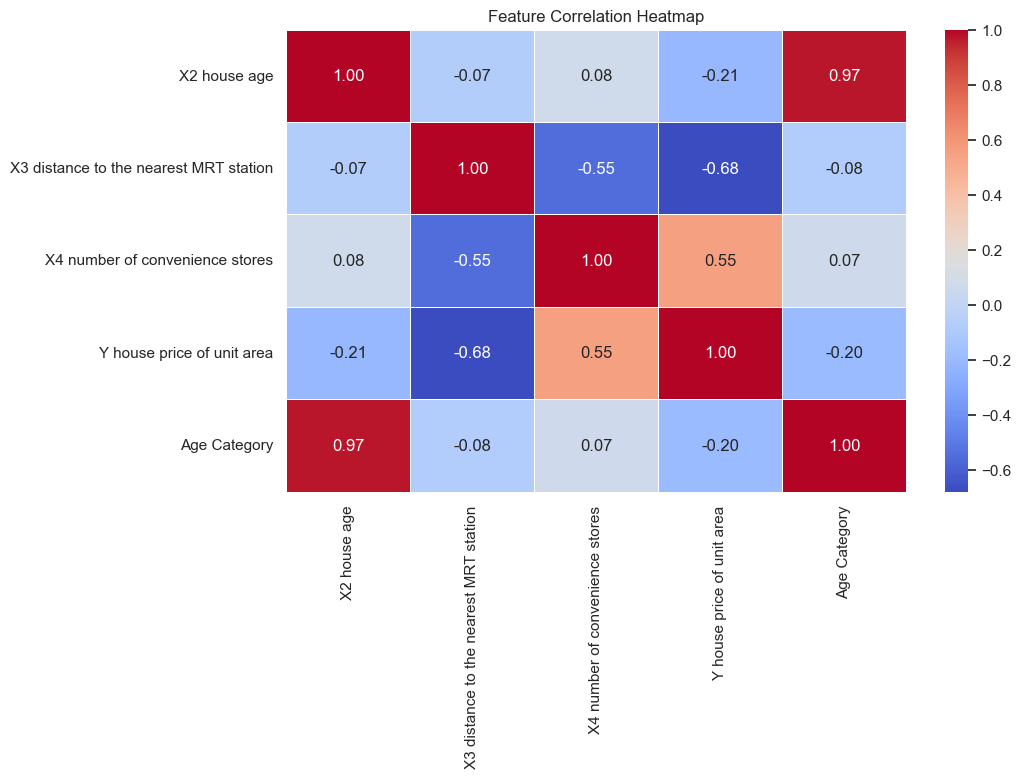

In [91]:
# Plot heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [92]:
# Check correlation with target variable
corr_matrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.552924
Age Category                             -0.195852
X2 house age                             -0.209615
X3 distance to the nearest MRT station   -0.679841
Name: Y house price of unit area, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Define features and target variable
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Linear Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'alpha': 10.0}, 0.5564693149126938)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [116]:
print("Evaluation for GridSearchCV Best Model:")
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R^2 Score: {r2}")
test_score = grid_search.best_estimator_.score(X_test, y_test)
print(f"Test Score: {test_score}")

Evaluation for GridSearchCV Best Model:
MSE: 203052.7430777446, R^2 Score: -188549.2582847722
Test Score: -188549.2582847722


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
